## The Sparks Foundation
### Data Science and Business Analytics: Task #2

### Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
"""
importing required libraries
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")

## Data Collection

In [2]:
"""
loading the dataset from csv file
"""
iris = pd.read_csv("/home/suzi/Desktop/Data Science_python/CSV Files/iris.csv")
print(len(iris))
iris.head(10)

150


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [4]:
"""
checking for Null values if any
"""
iris.isna()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
"""
describing statistical values
"""
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris["variety"].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

## Data Visualization

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

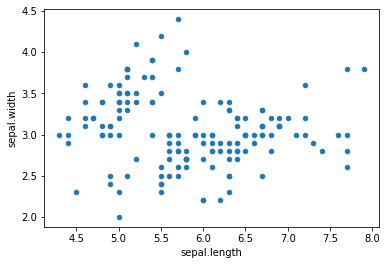

In [8]:
iris.plot(kind="scatter", x="sepal.length", y="sepal.width")

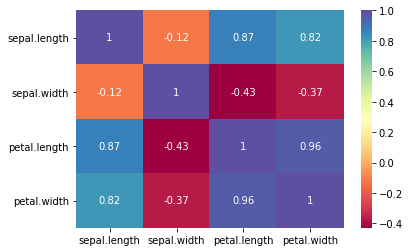

In [15]:
sns.heatmap(iris.corr(),annot=True,cmap="Spectral")
plt.show()

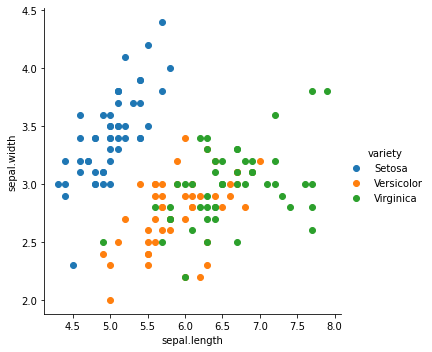

In [10]:
sns.FacetGrid(iris, hue="variety", size=5) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend()

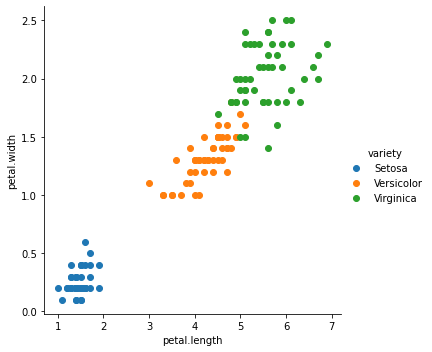

In [11]:
sns.FacetGrid(iris, hue="variety", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

## Elbow method to find optimum number of clusters

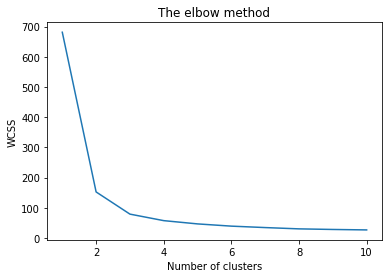

In [12]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### From the above graph, we can clearly see that Optimum number of cluster are 3

## Clustering the datapoints using KMeans Unsupervised ML algorithm

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing the clusters

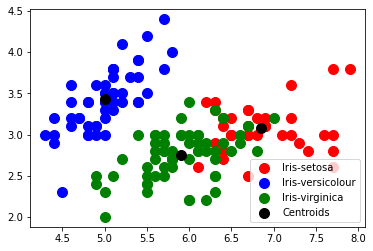

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()